In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, impute, decomposition, pipeline
from nilearn import masking, plotting

import sys
sys.path.insert(1, "../")
import mvcomp


# Import data,masks, and background image

In [3]:
cc_mask = "../../data/CC_11_mask.nii.gz"
cc_t2 = "../../data/CC_T2_warped_mean_1001subjects.nii.gz"


In [6]:
cc_d2_fname = "../../data/HCPXXXXXXX_voxelwise_CC_d2.npy" # censored
cc_d2 = np.load(cc_d2_fname)
cc_d2.shape

(2854, 2854)

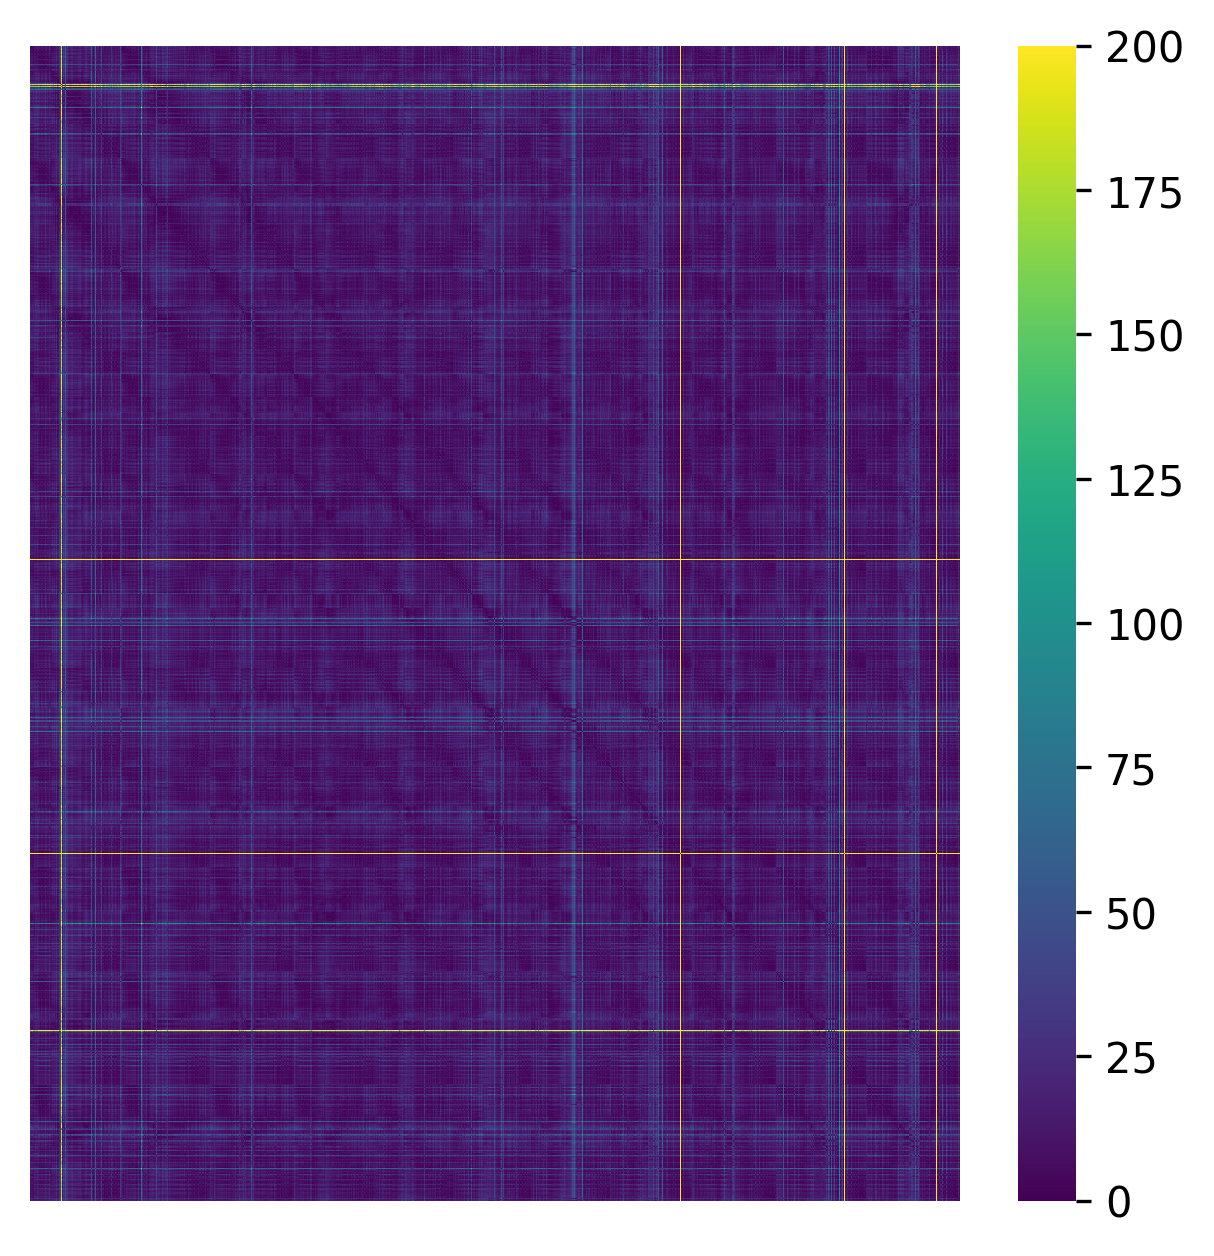

In [10]:
plt.figure(figsize=(5,5),dpi=300)
sns.heatmap(cc_d2,vmax=200, cmap="viridis",cbar=True);
plt.xticks([]); plt.yticks([]);

# Apply PCA on the D2 matrix

In [15]:
st = preprocessing.StandardScaler()
pca = decomposition.PCA()

In [24]:
cc_d2_st = st.fit_transform(cc_d2)
sub_pca_fit = pca.fit(cc_d2_st)
sub_pca = pca.transform(cc_d2_st)

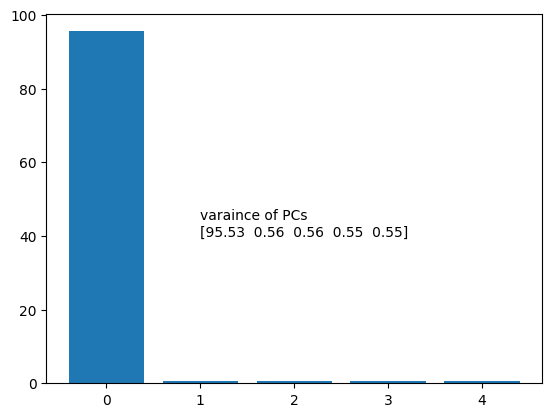

In [26]:
plt.bar(range(5), sub_pca_fit.explained_variance_ratio_[:5]*100);
plt.text(1,40, f"varaince of PCs\n{np.round(sub_pca_fit.explained_variance_ratio_*100, 2)[:5]}");

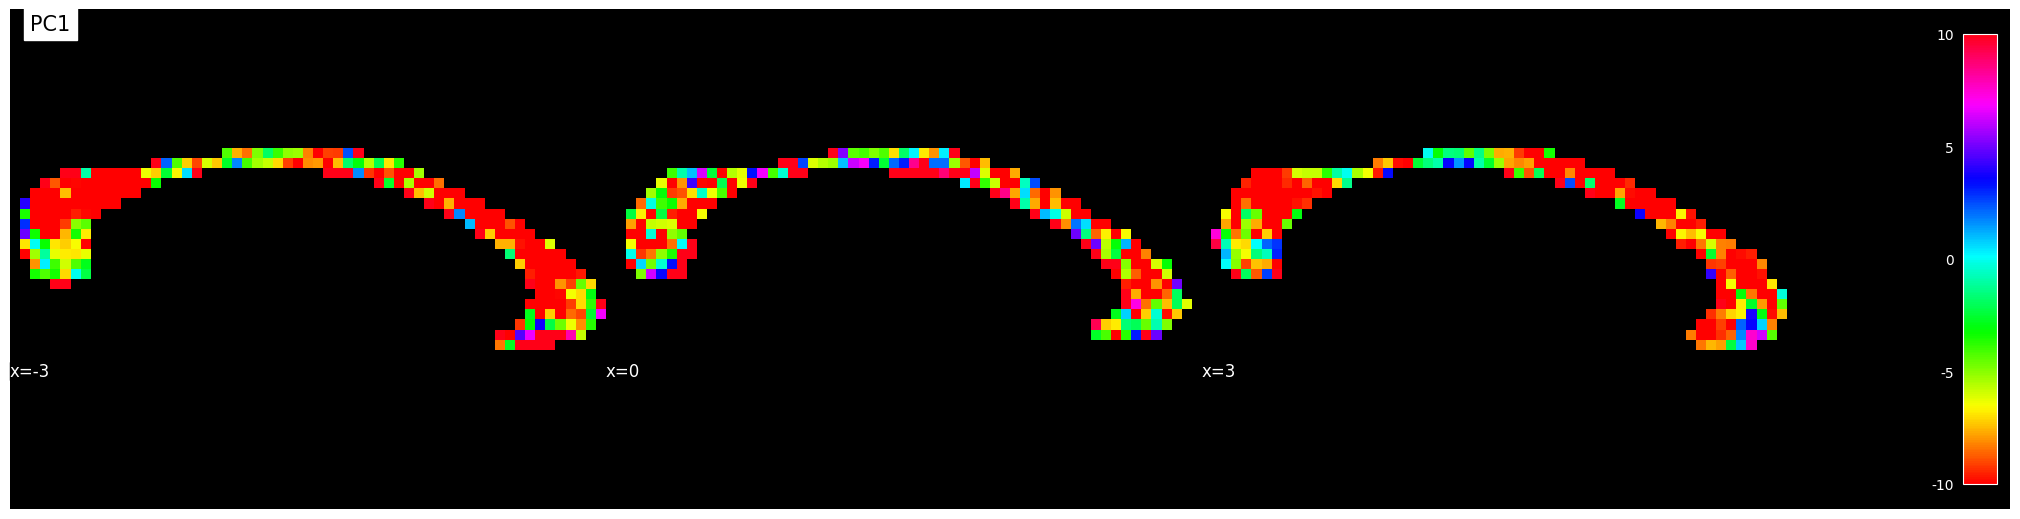

In [28]:
fig = plt.figure(figsize=(20,5))
_ = plotting.plot_stat_map(masking.unmask(sub_pca[:,0],cc_mask),bg_img=cc_t2,display_mode="x", cut_coords=[-3,0,3],cmap="hsv",
                                title=f"PC1", figure=fig,vmax=10)

# Apply Eigendecomposition on the D2 matrix

In [30]:
e_val, e_vec= np.linalg.eig(cc_d2)
e_val = np.real(e_val)
e_vec = np.real(e_vec)

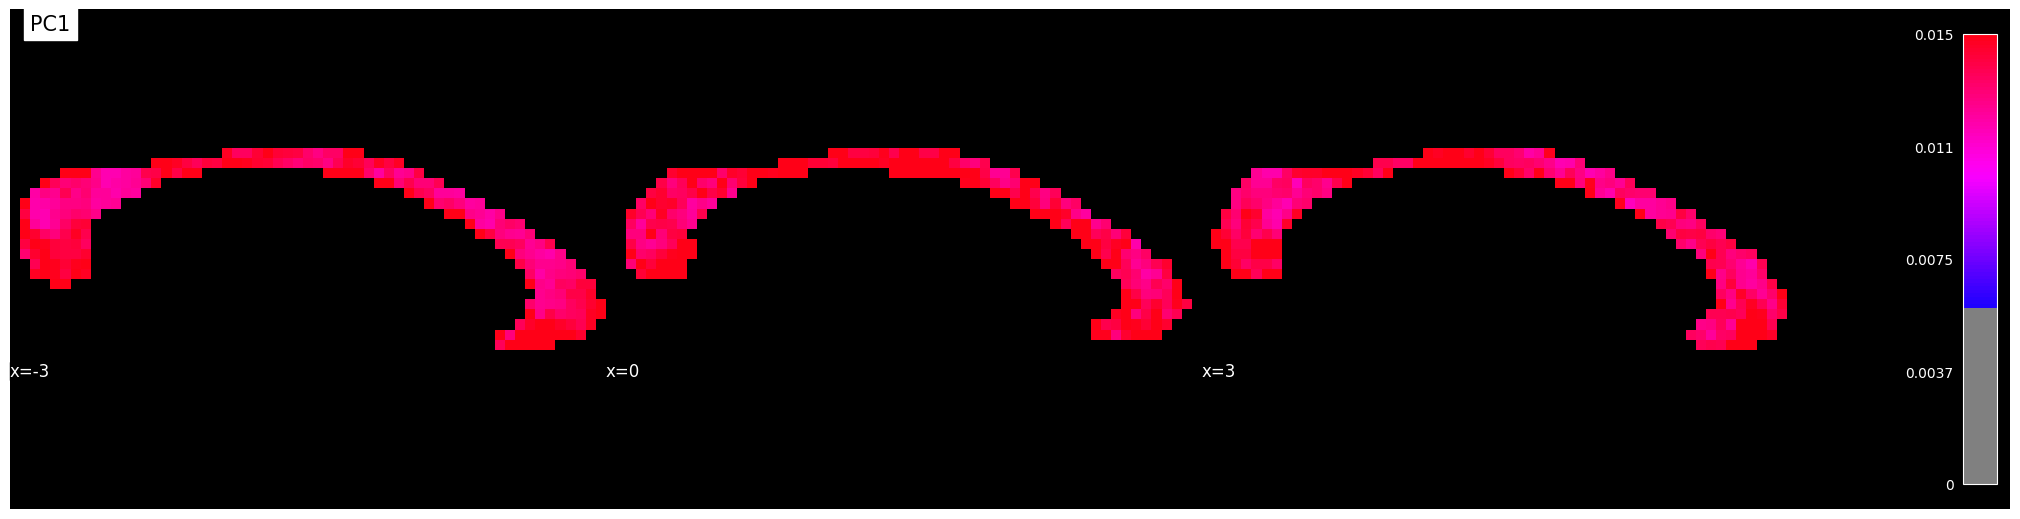

In [49]:
fig = plt.figure(figsize=(20,5))
_ = plotting.plot_stat_map(masking.unmask(e_vec[:,0],cc_mask),bg_img=cc_t2,display_mode="x", cut_coords=[-3,0,3],cmap="hsv",
                                title=f"PC1", figure=fig,threshold=.006, vmax=.015)

# Examine the association between the first component of each decomposition 

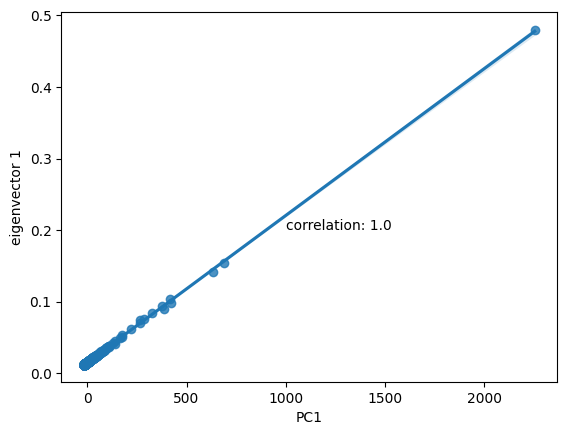

In [59]:
sns.regplot(x=sub_pca[:,0], y=e_vec[:,0]); plt.xlabel("PC1"); plt.ylabel("eigenvector 1");
plt.text(1000,.2, f"correlation: {np.round(np.corrcoef(sub_pca[:,0],e_vec[:,0])[0,1],2)}");